# Problem Set 1 - MNIST Dataset

- Load MNIST and show a montage of the images.
- Run a random y=mx model on MNIST
- Train random walk model to at least 75% accuracy
- Create a markdown (.md) report and add it to your GitHub

In [141]:
%%capture
import sys

# List of libraries to be installed
libraries = ['numpy', 'matplotlib', 'torch', 'torchvision', 'scikit-image', 'wandb']

# Iterating through the list and installing each library
for library in libraries:
    !{sys.executable} -m pip install {library}

# Now you can import the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
import wandb as wb
from skimage.io import imread

In [142]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float)

## Montage plot of MNIST Data

In [143]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [144]:
# Download MNIST data training and test sets 
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

In [145]:
# Create arrays for data test and training sets
X = train_set.data.numpy()
X_test = test_set.data.numpy()

# Create arrays for targets of test and training sets
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

# Set color channel to 1 (greyscale)
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

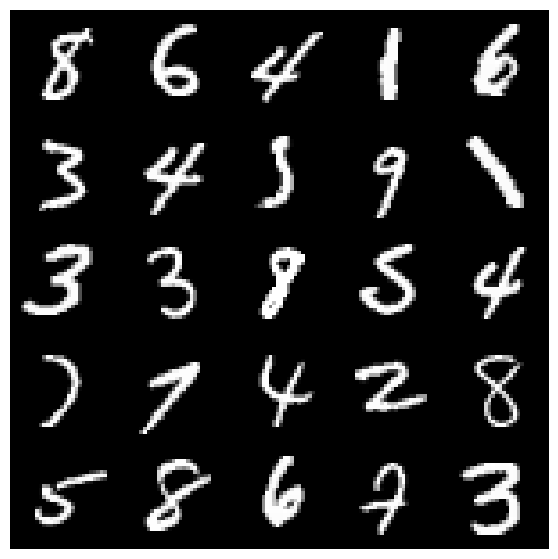

In [146]:
# Display montage of elements 125-150
montage_plot(X[125:150,0,:,:])

## Random y = mx model 

In [147]:
# Reshape train and test sets from 4D to 2D (flattening)
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [148]:
# Return tensor for x and y of training and test sets
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [149]:
# Transpose tensor
X = X.T

In [150]:
batch_size = 64

# initialize random matrix M 
M = GPU(np.random.rand(10,784))

# create new matrix that consists of the number of images of the n set in batch_size
x = X[:,0:batch_size]

# multiply random matrix M by x
y = M@x

# replace y with indices of the max values in each column (prediction)
y = torch.argmax(y,0)

# compare predictor y with Y targets and divide by batch size to get rate of success
torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0781)

## Train random walk model to at least 75% accuracy

In [151]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[50:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.17923332750797272
2 0.2009499967098236
3 0.22110000252723694
4 0.24523332715034485
5 0.26506665349006653
7 0.28025001287460327
8 0.29998332262039185
9 0.3167666792869568
10 0.3278999924659729
11 0.35385000705718994
12 0.3753666579723358
13 0.38981667160987854
14 0.39864999055862427
16 0.3997333347797394
17 0.40841665863990784
18 0.4088166654109955
19 0.4125500023365021
20 0.4163166582584381
21 0.4181833267211914
22 0.4264500141143799
23 0.435533344745636
24 0.4437499940395355
25 0.45028331875801086
26 0.4591333270072937
27 0.46388334035873413
28 0.46728333830833435
29 0.47448334097862244
30 0.4763999879360199
31 0.48225000500679016
32 0.4856500029563904
33 0.49531665444374084
34 0.5005499720573425
35 0.502216637134552
36 0.510200023651123
37 0.521399974822998
38 0.5267166495323181
39 0.5332000255584717
40 0.5376499891281128
41 0.5474833250045776
42 0.5511166453361511
43 0.5578833222389221
44 0.559499979019165
45 0.5645833611488342
46 0.5678499937057495
47 0.5745166540145874
48 0.57

KeyboardInterrupt: 